# Face Detection and Recognition
v 1.0.0

Assignment Sections: 
1.  Import Libraries and Mount Drive
2.  Image Detection Section 
3.  Image Recognition Section

Data dictionary:



```
-Colab Data
   -Known_Faces
      -Hrithik_Roshan.jpg
      -Tapsee_Pannu.jpg
      -Akshay_Kumar.jpg
      -Paresh_Rawal.jpg
      -Aamir_Khan.jpg
   -Unknown_Faces
      -unknown1.jpg
      -unknown2.jpg
      -unknown3.jpg
   -celebs.jpg

Note : I have used Google Colab and used google drive to load images from.
```

# Section 1 - Import Libraries and Mount Drive

---



In [ ]:
!pip install Pillow 
!pip install face-recognition

     |████████████████████████████████| 100.2MB 106kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=0bc1f31e256d7899477e8a562031594f61447434bc49baf39091864665031238
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
import PIL.Image
import PIL.ImageFont
import PIL.ImageDraw
import face_recognition 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import cv2
%matplotlib inline
my_font = PIL.ImageFont.truetype('/content/drive/My Drive/Colab Data/arial.ttf', 30)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Section 2 - Image Detection Section 
*(Using my images)*

---



In [ ]:
image_path='/content/drive/My Drive/Colab Data/celebs.jpg' #test image
given_image = face_recognition.load_image_file(image_path)
#plt.imshow(image1)

We found 8 face(s) in this image.
Face 1 detected at pixel location Top: 98, Left: 553, Bottom: 134, Right: 517
Face 2 detected at pixel location Top: 103, Left: 184, Bottom: 146, Right: 141
Face 3 detected at pixel location Top: 102, Left: 285, Bottom: 138, Right: 249
Face 4 detected at pixel location Top: 98, Left: 481, Bottom: 134, Right: 445
Face 5 detected at pixel location Top: 98, Left: 93, Bottom: 142, Right: 50
Face 6 detected at pixel location Top: 90, Left: 645, Bottom: 126, Right: 609
Face 7 detected at pixel location Top: 86, Left: 729, Bottom: 122, Right: 693
Face 8 detected at pixel location Top: 102, Left: 385, Bottom: 138, Right: 349


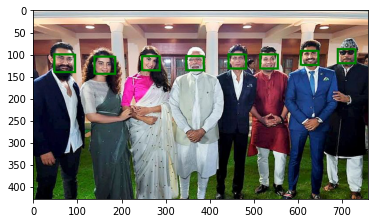

In [ ]:
face_locations = face_recognition.face_locations(given_image)  #get locations of face/faces in image
number_of_faces = len(face_locations) #count no of faces in image
print("We found {} face(s) in this image.".format(number_of_faces))
pil_image = PIL.Image.fromarray(given_image)
i=1
for face_location in face_locations:
    top, left, bottom, right = face_location #save current face location co-ordinates in top,left,bottom,right
    print("Face {} detected at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format((i),top, left, bottom, right))
    draw = PIL.ImageDraw.Draw(pil_image) #draw image
    draw.rectangle([left, top, right, bottom], outline="green", width=5) #draw rectangle on face/faces in image
    i+=1
plt.imshow(pil_image) 

# Section 3 - Image Recognition Section 
*(Using celeb images)*

---



In [ ]:
import os 
known_images_names = os.listdir('/content/drive/My Drive/Colab Data/Known_Faces') #get all the names of known face images

Image to be matched


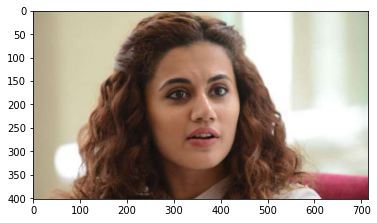

In [ ]:
image_to_be_matched = face_recognition.load_image_file('/content/drive/My Drive/Colab Data/Unknown_Faces/unknown2.jpg') #load unknown image which needs to be matched
image_to_be_matched_encoded = face_recognition.face_encodings(image_to_be_matched)[0] #encode the loaded image into a feature vector
plt.imshow(image_to_be_matched)
print('Image to be matched')

Checking Unknown Face with our Known Faces... 

Not matched: Hrithik Roshan
Unknown Image matches with : Tapsee Pannu
Not matched: Aamir Khan
Not matched: Paresh Rawal
Not matched: Akshay Kumar


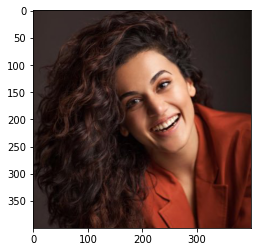

In [ ]:
print("Checking Unknown Face with our Known Faces... \n")
matched_name="Unknown"

for image in known_images_names:
    current_image = face_recognition.load_image_file("/content/drive/My Drive/Colab Data/Known_Faces/" + image) #load each image from known images   
    current_image_encoded = face_recognition.face_encodings(current_image)[0] #encode the loaded image into a feature vector
    result = face_recognition.compare_faces([image_to_be_matched_encoded], current_image_encoded) #match unknown image with the current image
    image_name=image[:image.index(".")].replace("_"," ") #Trimming '.jpg' and replace '_' 
    
    if result[0] == True:                                      # if both images match
        print("Unknown Image matches with : " + image_name)
        plt.imshow(current_image) 
        matched_name=image[:image.index(".")].replace("_"," ") # Trimming '.jpg' and replace '_' 
    else:                                                      # if images doesn't match
        print("Not matched: " + image_name)

This person is Tapsee Pannu


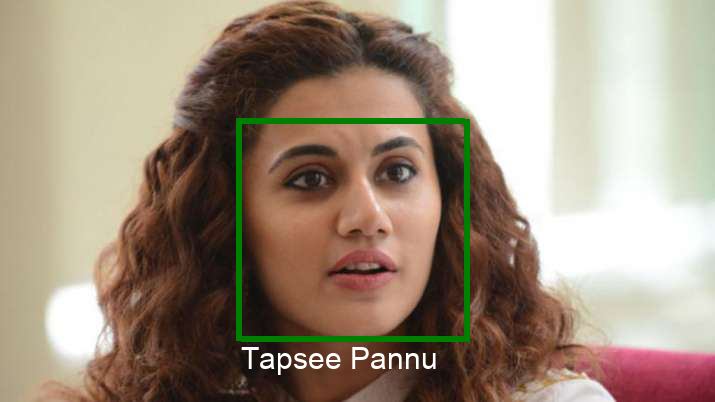

In [ ]:
face_locations_matched = face_recognition.face_locations(image_to_be_matched) #get locations of face/faces in unknown image
top, left, bottom, right = face_locations_matched[0] #save location co-ordinates in top,left,bottom,right
        
pil_image_matched = PIL.Image.fromarray(image_to_be_matched)
draw = PIL.ImageDraw.Draw(pil_image_matched)
draw.rectangle([left, top, right, bottom], outline="green", width=6) #draw rectangle on face in image
draw.text((right,bottom),matched_name,font=my_font) #draw text on face in image
#plt.imshow(pil_image_matched)
print("This person is "+matched_name)
pil_image_matched

# Author - Laveena Valecha
Email - valechalaveena21@gmail.com

LinkedIn - www.linkedin.com/in/laveenavalecha